### Student Details

Student name: Bhagyalakshmy Saburaj

Student ID: 25275224

General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

In [235]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [236]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [237]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

Insert your code below.

In [238]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        # initialize weights and cost list
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.epochs):
            z = self.net_input(X)
            h = self.activation(z)
            errors = (y - h)
            # update weights
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # compute logistic cost
            cost = -y.dot(np.log(h + 1e-5)) - ((1 - y).dot(np.log(1 - h + 1e-5)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # Sigmoid activation function
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        # Predict class label based on 0.5 threshold
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [239]:
##read the csv file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#defining column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=column_names)

#getting the species name to make sure the spelling is correct
print("Name of all species:", df['species'].unique())
print("Number of species:", df['species'].nunique())


Name of all species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Number of species: 3


In [240]:
# 1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length (use the provided iris_data.csv file on Brightspace)


# Selecting only Iris-setosa and Iris-versicolor
df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Extracting the features (sepal length and petal length)
X = df[['sepal_length', 'petal_length']].values

# Setting labels, for Iris-setosa as class 0 and for Iris-versicolor as class 1
y = np.where(df['species'] == 'Iris-setosa', 0, 1)

In [241]:
# 2. Train the algorithm using the default values of eta and epochs

log_reg = LogisticRegressionGD(eta=0.01, epochs=50)  # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!
log_reg.train(X, y)

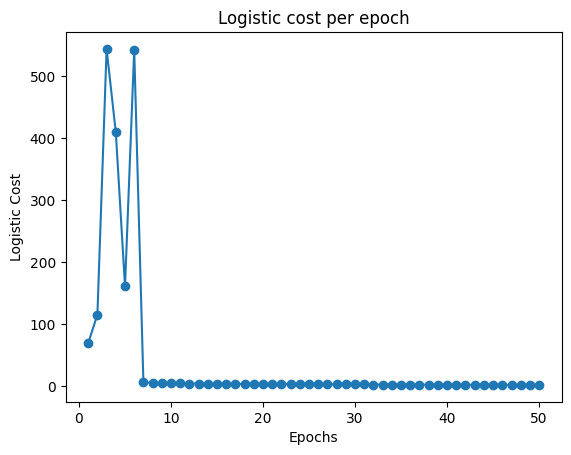

In [242]:
# 3. Plot the Logistic cost per epoch of training
plt.plot(range(1, len(log_reg.cost_) + 1), log_reg.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.title('Logistic cost per epoch')
plt.show()

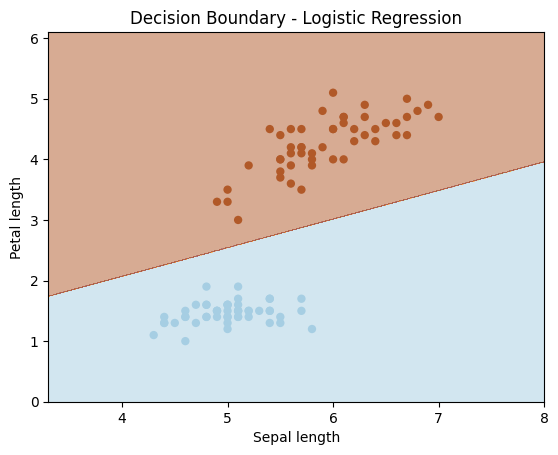

In [243]:
# 4. Plot the decision boundary using the supplied plot_decision_boundary function

fig, ax = plot_decision_boundary(X, y, log_reg)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_title('Decision Boundary - Logistic Regression')
plt.show()


In [244]:
#training the algorithm when learning rate is set as 0.001 to see if there is any difference in cost curve

log_reg = LogisticRegressionGD(eta=0.001, epochs=50)  # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!
log_reg.train(X, y)



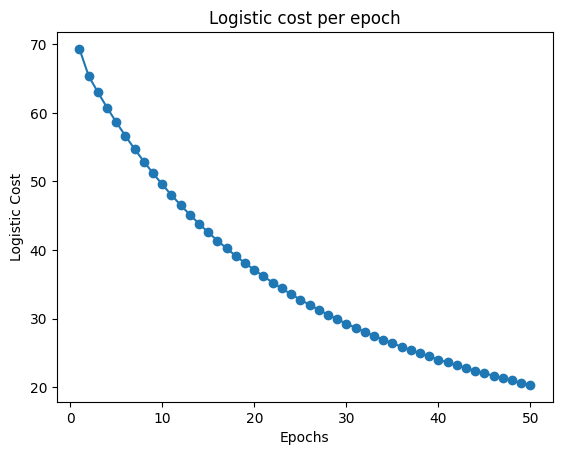

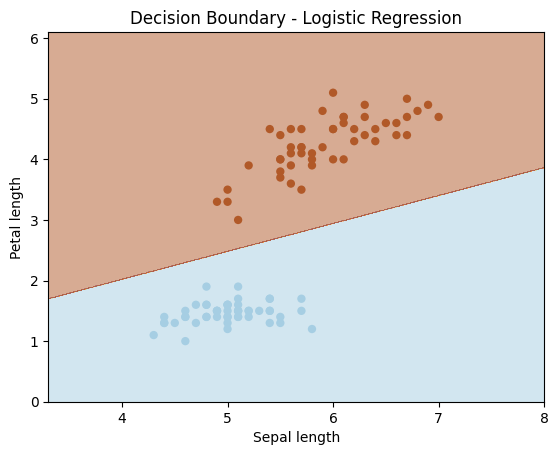

In [245]:
# Plot the Logistic cost per epoch of training
plt.plot(range(1, len(log_reg.cost_) + 1), log_reg.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.title('Logistic cost per epoch')
plt.show()

#Plot the decision boundary
fig, ax = plot_decision_boundary(X, y, log_reg)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_title('Decision Boundary - Logistic Regression')
plt.show()

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

Insert your code below.

In [246]:
# 1. Load all of the samples from the Iris dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#defining column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=column_names)

#getting the species name to make sure the spelling is correct
print("Name of all species:", df['species'].unique())
print("Number of species:", df['species'].nunique())


Name of all species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Number of species: 3


In [247]:
# Extracting the features (sepal length and petal length)
X = df[['petal_length', 'petal_width']].values

# assigning labels where, iris-setosa = 0, iris-versicolor = 1, iris-virginica = 2
y = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

In [248]:
# 2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)# !!! DO NOT CHANGE THE NAMES OF THE SPLITS !!!

In [249]:
# 3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)  # !!!DO NOT CHANGE NAME!!!
X_test_scaled_2 = scaler.transform(X_test_2)  # !!!DO NOT CHANGE NAME!!!

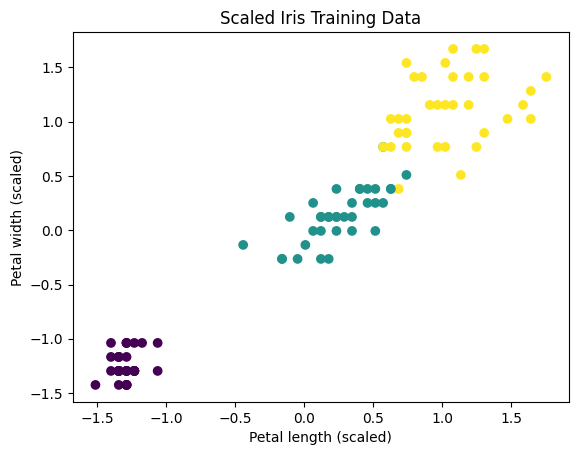

In [250]:
# Plot the scaled data

plt.scatter(X_train_scaled_2[:, 0], X_train_scaled_2[:, 1], c=y_train_2, cmap='viridis')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('Scaled Iris Training Data')
plt.show()

In [251]:
# 4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
from sklearn.linear_model import LogisticRegression

sk_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)  # !!!USE THE DEFAULT PARAMETERS. DO NOT CHANGE THE NAME OF THE MODEL!!!
sk_log_reg.fit(X_train_scaled_2, y_train_2)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

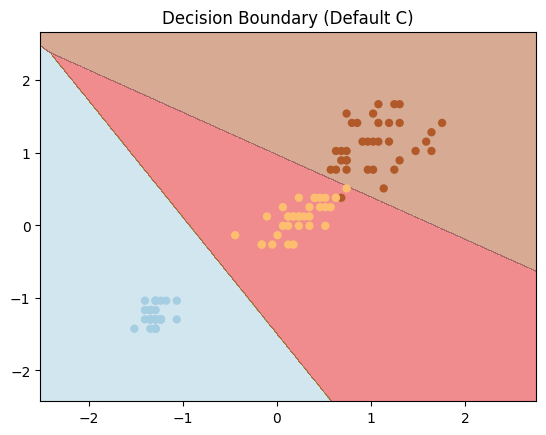

In [252]:
# 5. Plot the decision boundary using the supplied plot_decision_boundary function

fig, ax = plot_decision_boundary(X_train_scaled_2, y_train_2, sk_log_reg)
ax.set_title('Decision Boundary (Default C)')
plt.show()

In [253]:
# 6. Using sklearn's accuracy_score, calculate the accuracy score on the test data
from sklearn.metrics import accuracy_score

y_pred_2 = sk_log_reg.predict(X_test_scaled_2)
accuracy_score_2 = accuracy_score(y_test_2, y_pred_2)  # !!! DO NOT CHANGE THE NAME OF THE VARIABLE !!!
print("Test Accuracy:", accuracy_score_2)

Test Accuracy: 0.9111111111111111


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


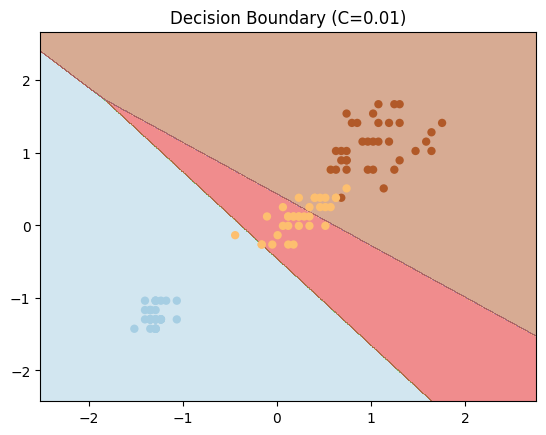

In [254]:
# Plot the decision boundary again for smaller and larger values of C

# Smaller C for stronger regularization
sk_log_reg_smallC = LogisticRegression(C=0.01, multi_class='multinomial', solver='lbfgs', random_state=42)
sk_log_reg_smallC.fit(X_train_scaled_2, y_train_2)
fig, ax = plot_decision_boundary(X_train_scaled_2, y_train_2, sk_log_reg_smallC)
ax.set_title('Decision Boundary (C=0.01)')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


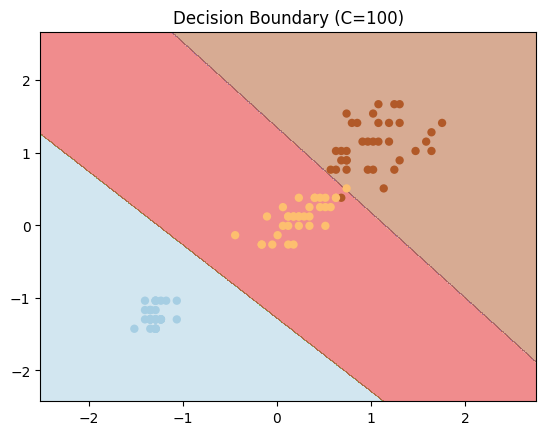

In [255]:
# Larger C for weaker regularization
sk_log_reg_largeC = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs', random_state=42)
sk_log_reg_largeC.fit(X_train_scaled_2, y_train_2)
fig, ax = plot_decision_boundary(X_train_scaled_2, y_train_2, sk_log_reg_largeC)
ax.set_title('Decision Boundary (C=100)')
plt.show()


What do you observe?

Insert your text answers below.

When we set the C=0.01, there are overlaps between Iris-versicolor and Iris-virginica samples. Whereas, when we set the C=100, the boundaries closely follow the data points and separates the three classes with minimum overlap. This is because when we reduce the C value, the model is heavily regularized and that resuls in simpler and less flexible decision boundaries. But when C=100, the regularization is weaker. This allows the model to fit the data more closely and produce more complex boundaries that separates the classes properly.


# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Insert your code below.

In [256]:

# 1. Load all of the samples from the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#defining column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=column_names)

#getting the species name to make sure the spelling is correct
print("Name of all species:", df['species'].unique())
print("Number of species:", df['species'].nunique())

Name of all species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Number of species: 3


In [257]:
# 2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # !!! DO NOT CHANGE THE NAMES OF THE SPLITS !!!

In [258]:
# 3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
from sklearn.preprocessing import StandardScaler

scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3)  # !!!DO NOT CHANGE NAME!!!
X_test_scaled_3 = scaler_3.transform(X_test_3)        # !!!DO NOT CHANGE NAME!!!

In [259]:
# 4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
from sklearn.svm import SVC


svc_3 = SVC(kernel='linear', random_state=42) # !!!USE THE DEFAULT PARAMETERS, EXCEPT SET KERNEL TO LINEAR. DO NOT CHANGE THE NAME OF THE MODEL!!!
svc_3.fit(X_train_scaled_3, y_train_3)

SVC(kernel='linear', random_state=42)

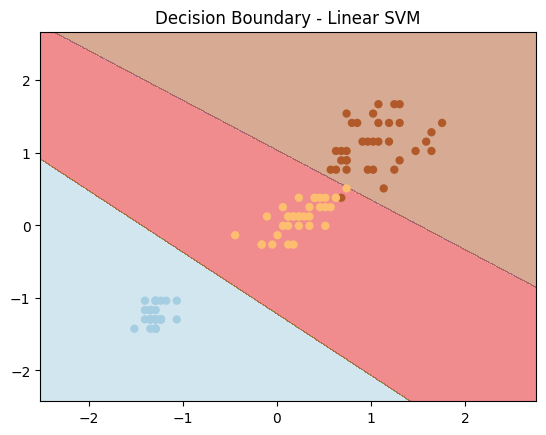

In [260]:
# 5. Plot the decision boundary using the supplied plot_decision_boundary function
fig, ax = plot_decision_boundary(X_train_scaled_3, y_train_3, svc_3)
plt.title('Decision Boundary - Linear SVM')
plt.show()


In [261]:
# 6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

from sklearn.metrics import accuracy_score

y_pred_3 = svc_3.predict(X_test_scaled_3)  # !!! DO NOT CHANGE THE NAME OF THE VARIABLE !!!
accuracy_score_3 = accuracy_score(y_test_3, y_pred_3)
print("Test Accuracy:", accuracy_score_3)

Test Accuracy: 0.9111111111111111


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

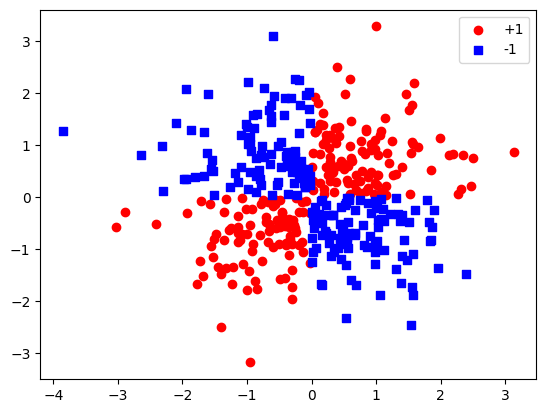

In [262]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

Insert your code below.

In [275]:
# 1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data

################################
svc_4_01 = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=42)
svc_4_01.fit(X_r, y_r)  # !!!DO NOT CHANGE THE NAME OF THE MODEL. CHOOSE GAMMA=0.1!!!

SVC(gamma=0.1, random_state=42)

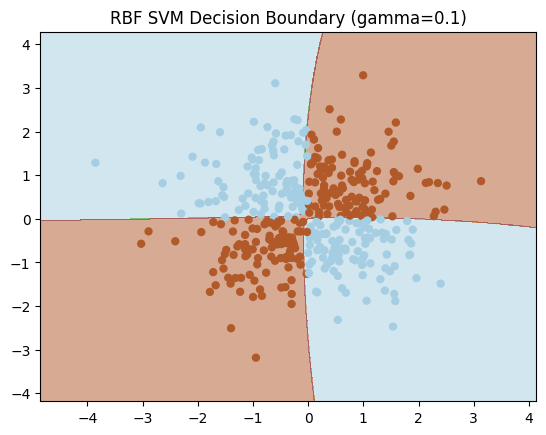

In [276]:
# 2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
fig, ax = plot_decision_boundary(X_r, y_r, svc_4_01)
ax.set_title('RBF SVM Decision Boundary (gamma=0.1)')
plt.show()

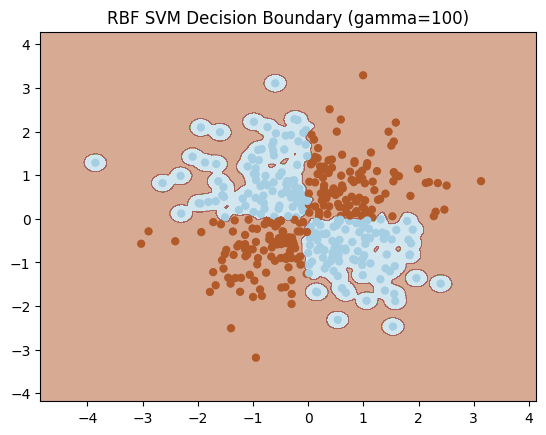

In [265]:
# 3. Change the gamma value to 100.

svc_4_100 = SVC(kernel='rbf', gamma=100, C=1.0, random_state=42)
svc_4_100.fit(X_r, y_r) # !!!DO NOT CHANGE THE NAME OF THE MODEL. CHOOSE GAMMA=100!!!

fig, ax = plot_decision_boundary(X_r, y_r, svc_4_100)
ax.set_title('RBF SVM Decision Boundary (gamma=100)')
plt.show()


**Discuss**: What happens? What is the problem with this result? Describe what is happening based on the resources given in the activity.

When gamma is set at 100, the decision boundary becomes extremely complex and tightly wraps around the data points. This leads to overfitting. On the other hand, when gamma is set at 0.1, the decision boundary becomes really smooth and fails to capture the real patterns in the data. This leads to underfitting. Therefore, the problem here is the improper choice of the gamma parameter, which controls the balance between bias and variance. Also, it took long for this to compile.

In [266]:
# 4. Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution


# 1. Load all of the samples from the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#defining column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=column_names)

#getting the species name to make sure the spelling is correct
print("Name of all species:", df['species'].unique())
print("Number of species:", df['species'].nunique())

Name of all species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Number of species: 3


In [267]:
# Extracting the features (sepal length and petal length)
X = df[['petal_length', 'petal_width']].values

# assigning labels where, iris-setosa = 0, iris-versicolor = 1, iris-virginica = 2
y = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

In [268]:

# Use the scikit-learn train_test_split function to split into 30% test and 70% training data
from sklearn.model_selection import train_test_split

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

In [269]:

#Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
scaler_4 = StandardScaler()
X_train_scaled_4 = scaler_4.fit_transform(X_train_4)
X_test_scaled_4 = scaler_4.transform(X_test_4)


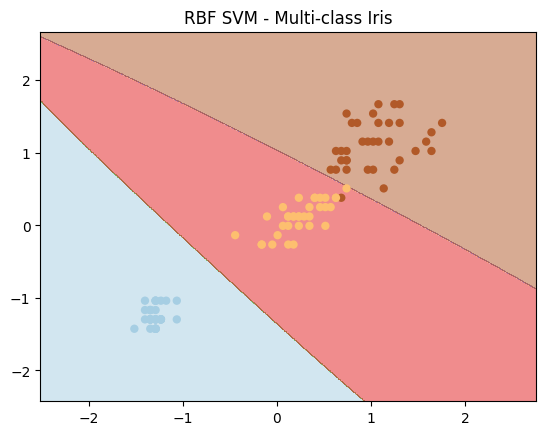

Test accuracy (Iris RBF SVM): 0.9111111111111111


In [270]:
# RBF SVM for multi-class Iris
svc_iris_rbf = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=42)  # gamma chosen to balance fit
svc_iris_rbf.fit(X_train_scaled_4, y_train_4)

# Plot decision boundary
fig, ax = plot_decision_boundary(X_train_scaled_4, y_train_4, svc_iris_rbf)
ax.set_title('RBF SVM - Multi-class Iris')
plt.show()

# Accuracy on test data
from sklearn.metrics import accuracy_score
y_pred_iris = svc_iris_rbf.predict(X_test_scaled_4)
accuracy_iris_rbf = accuracy_score(y_test_4, y_pred_iris)
print("Test accuracy (Iris RBF SVM):", accuracy_iris_rbf)

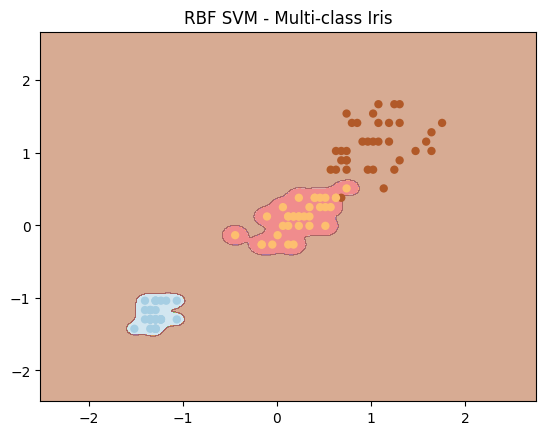

Test accuracy (Iris RBF SVM): 0.9111111111111111


In [271]:
# RBF SVM for multi-class Iris
svc_iris_rbf = SVC(kernel='rbf', gamma=100, C=1.0, random_state=42)  # gamma chosen to balance fit
svc_iris_rbf.fit(X_train_scaled_4, y_train_4)

# Plot decision boundary
fig, ax = plot_decision_boundary(X_train_scaled_4, y_train_4, svc_iris_rbf)
ax.set_title('RBF SVM - Multi-class Iris')
plt.show()

# Accuracy on test data
from sklearn.metrics import accuracy_score
y_pred_iris = svc_iris_rbf.predict(X_test_scaled_4)
accuracy_iris_rbf = accuracy_score(y_test_4, y_pred_iris)
print("Test accuracy (Iris RBF SVM):", accuracy_iris_rbf)

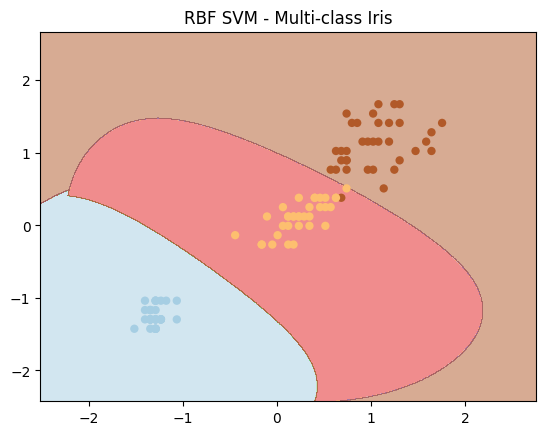

Test accuracy (Iris RBF SVM): 0.9111111111111111


In [272]:
# RBF SVM for multi-class Iris
svc_iris_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0, random_state=42)  # gamma chosen to balance fit
svc_iris_rbf.fit(X_train_scaled_4, y_train_4)

# Plot decision boundary
fig, ax = plot_decision_boundary(X_train_scaled_4, y_train_4, svc_iris_rbf)
ax.set_title('RBF SVM - Multi-class Iris')
plt.show()

# Accuracy on test data
from sklearn.metrics import accuracy_score
y_pred_iris = svc_iris_rbf.predict(X_test_scaled_4)
accuracy_iris_rbf = accuracy_score(y_test_4, y_pred_iris)
print("Test accuracy (Iris RBF SVM):", accuracy_iris_rbf)

I just tried using different gamma values to see their effect on the decision boundary. With gamma = 0.1, the boundary is smooth and generalizes well. With gamma = 100, the model is overfited and it creates a very complex boundary. An intermediate value like gamma = 0.5 produces a reasonable boundary, balancing flexibility and generalization.